# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

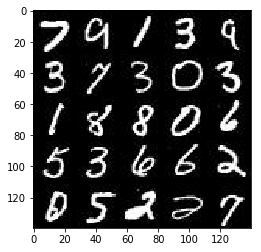

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

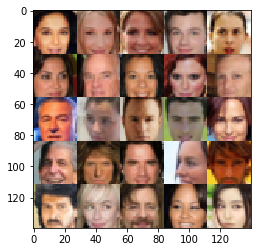

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_image = tf.placeholder(tf.float32,(None,image_width,image_height,image_channels))
    input_z = tf.placeholder(tf.float32,(None,z_dim))
    lr = tf.placeholder(tf.float32)
    return input_image, input_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.3
    keep_probability = 0.8
    # TODO: Implement Function
    with tf.variable_scope("discriminator",reuse=reuse):
        
        x = tf.layers.conv2d(images,32,5,strides=2,padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer())
        x = tf.maximum(alpha*x,x)
        x = tf.nn.dropout(x, keep_probability)
#         14x14x32
        
        x = tf.layers.conv2d(x,64,5,strides=2,padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer())
        x = tf.layers.batch_normalization(x,training=True)
        x = tf.maximum(alpha*x,x)
        x = tf.nn.dropout(x, keep_probability)
#         7x7x64
        x = tf.layers.conv2d(x,128,5,strides=2,padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer())
        x = tf.layers.batch_normalization(x,training=True)
        x = tf.maximum(alpha*x,x)
        x = tf.nn.dropout(x, keep_probability)
#         4x4x128
        
        
        flat = tf.reshape(x, [-1, 4*4*128])
        logits = tf.layers.dense(flat, 1,kernel_initializer=tf.contrib.layers.xavier_initializer())
        out = tf.sigmoid(logits)
        
        
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
        
    # I will use leaky ReLU
    alpha = 0.2
    keep_probability=0.8
    
    with tf.variable_scope('generator', reuse=(not is_train)):
    
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512, 
                             kernel_initializer=tf.contrib.layers.xavier_initializer())
        
        # Reshape it to start the convolutional stack
        x2 = tf.reshape(x1, (-1, 7, 7, 512))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_probability)
        # 7x7x512 now
        
        x3 = tf.layers.conv2d_transpose(x2, 256, 4, strides=2, padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, keep_probability)
        
        # 14x14x256 now
        
        x4 = tf.layers.conv2d_transpose(x3, 128, 5, strides=1, padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer())
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        x4 = tf.nn.dropout(x4, keep_probability)
        # 14x14x128 now
        
        x5 = tf.layers.conv2d_transpose(x4, 64, 5, strides=2, padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer())
        x5 = tf.layers.batch_normalization(x5, training=is_train)
        x5 = tf.maximum(alpha * x5, x5)
        x5 = tf.nn.dropout(x5, keep_probability)
        # 28x28x64 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x5, out_channel_dim, 5, strides=1, padding='same',
                                            kernel_initializer=tf.contrib.layers.xavier_initializer())
        # 28x28x1 or 28x28x3 now
    
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [14]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print(data_shape)
    print_every =10
    show_every =100
    steps = 0
    input_image, input_z, lr= model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss=model_loss(input_image,input_z,data_shape[3])
    d_train_opt, g_train_opt=model_opt(d_loss, g_loss, learning_rate, beta1)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images = batch_images*2 

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_image: batch_images, input_z: batch_z,lr:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_image: batch_images, input_z: batch_z,lr:learning_rate})
        
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_image: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({ input_z: batch_z})
#                     logits_real = sess.run(d_logits_real,feed_dict={input_image: batch_images, input_z: batch_z})
#                     logits_fake = d_logits_fake.eval({ input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training

                if steps % show_every == 0:
                    show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1)
Epoch 1/2... Discriminator Loss: 0.9468... Generator Loss: 2.0207
Epoch 1/2... Discriminator Loss: 2.8149... Generator Loss: 6.4547
Epoch 1/2... Discriminator Loss: 2.5627... Generator Loss: 3.9489
Epoch 1/2... Discriminator Loss: 1.1359... Generator Loss: 1.1350
Epoch 1/2... Discriminator Loss: 1.8569... Generator Loss: 2.1207
Epoch 1/2... Discriminator Loss: 1.5457... Generator Loss: 2.3340
Epoch 1/2... Discriminator Loss: 1.3903... Generator Loss: 1.8062
Epoch 1/2... Discriminator Loss: 1.5202... Generator Loss: 1.7156
Epoch 1/2... Discriminator Loss: 1.4434... Generator Loss: 1.0956
Epoch 1/2... Discriminator Loss: 1.6923... Generator Loss: 1.2597


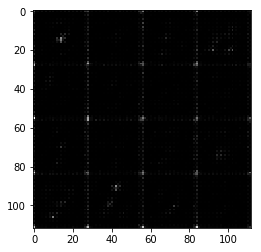

Epoch 1/2... Discriminator Loss: 1.7575... Generator Loss: 1.6862
Epoch 1/2... Discriminator Loss: 1.6314... Generator Loss: 1.7023
Epoch 1/2... Discriminator Loss: 1.5193... Generator Loss: 1.3937
Epoch 1/2... Discriminator Loss: 1.5954... Generator Loss: 1.2553
Epoch 1/2... Discriminator Loss: 1.3986... Generator Loss: 1.2047
Epoch 1/2... Discriminator Loss: 1.6056... Generator Loss: 1.1406
Epoch 1/2... Discriminator Loss: 1.5035... Generator Loss: 1.1464
Epoch 1/2... Discriminator Loss: 1.3890... Generator Loss: 1.0668
Epoch 1/2... Discriminator Loss: 1.4143... Generator Loss: 1.2697
Epoch 1/2... Discriminator Loss: 1.5265... Generator Loss: 1.0527


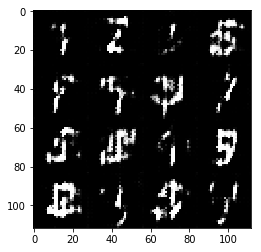

Epoch 1/2... Discriminator Loss: 1.5164... Generator Loss: 1.4814
Epoch 1/2... Discriminator Loss: 1.3668... Generator Loss: 1.2742
Epoch 1/2... Discriminator Loss: 1.3433... Generator Loss: 0.8884
Epoch 1/2... Discriminator Loss: 1.4594... Generator Loss: 0.4939
Epoch 1/2... Discriminator Loss: 1.4474... Generator Loss: 0.5890
Epoch 1/2... Discriminator Loss: 1.4610... Generator Loss: 0.5286
Epoch 1/2... Discriminator Loss: 1.3480... Generator Loss: 0.8384
Epoch 1/2... Discriminator Loss: 1.4978... Generator Loss: 0.5159
Epoch 1/2... Discriminator Loss: 1.3048... Generator Loss: 0.5936
Epoch 1/2... Discriminator Loss: 1.6464... Generator Loss: 0.3677


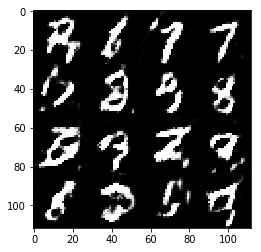

Epoch 1/2... Discriminator Loss: 1.3953... Generator Loss: 0.5036
Epoch 1/2... Discriminator Loss: 1.5561... Generator Loss: 0.4075
Epoch 1/2... Discriminator Loss: 1.0914... Generator Loss: 1.1716
Epoch 1/2... Discriminator Loss: 1.5699... Generator Loss: 1.9596
Epoch 1/2... Discriminator Loss: 1.3644... Generator Loss: 1.0332
Epoch 1/2... Discriminator Loss: 1.4787... Generator Loss: 1.1908
Epoch 1/2... Discriminator Loss: 1.2787... Generator Loss: 1.1559
Epoch 1/2... Discriminator Loss: 1.4981... Generator Loss: 1.5425
Epoch 1/2... Discriminator Loss: 1.3470... Generator Loss: 0.8902
Epoch 1/2... Discriminator Loss: 1.3728... Generator Loss: 1.2695


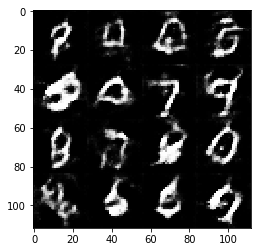

Epoch 1/2... Discriminator Loss: 1.3379... Generator Loss: 0.9451
Epoch 1/2... Discriminator Loss: 1.4423... Generator Loss: 1.2168
Epoch 1/2... Discriminator Loss: 1.3925... Generator Loss: 1.1945
Epoch 1/2... Discriminator Loss: 1.4323... Generator Loss: 0.9240
Epoch 1/2... Discriminator Loss: 1.3574... Generator Loss: 1.1415
Epoch 1/2... Discriminator Loss: 1.3564... Generator Loss: 1.0629
Epoch 2/2... Discriminator Loss: 1.3151... Generator Loss: 0.7333
Epoch 2/2... Discriminator Loss: 1.3894... Generator Loss: 0.6643
Epoch 2/2... Discriminator Loss: 1.3171... Generator Loss: 0.9067
Epoch 2/2... Discriminator Loss: 1.4223... Generator Loss: 1.1850


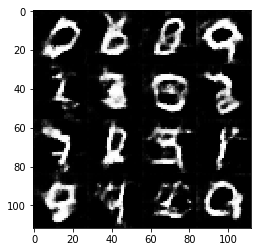

Epoch 2/2... Discriminator Loss: 1.3344... Generator Loss: 0.9489
Epoch 2/2... Discriminator Loss: 1.3783... Generator Loss: 1.1238
Epoch 2/2... Discriminator Loss: 1.3707... Generator Loss: 1.0337
Epoch 2/2... Discriminator Loss: 1.3963... Generator Loss: 1.3162
Epoch 2/2... Discriminator Loss: 1.3382... Generator Loss: 0.9072
Epoch 2/2... Discriminator Loss: 1.3707... Generator Loss: 1.0212
Epoch 2/2... Discriminator Loss: 1.4391... Generator Loss: 1.3373
Epoch 2/2... Discriminator Loss: 1.3062... Generator Loss: 0.9746
Epoch 2/2... Discriminator Loss: 1.4257... Generator Loss: 1.1566
Epoch 2/2... Discriminator Loss: 1.3195... Generator Loss: 0.7669


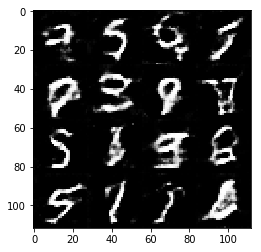

Epoch 2/2... Discriminator Loss: 1.3957... Generator Loss: 0.5863
Epoch 2/2... Discriminator Loss: 1.3306... Generator Loss: 0.8732
Epoch 2/2... Discriminator Loss: 1.3103... Generator Loss: 0.8848
Epoch 2/2... Discriminator Loss: 1.4154... Generator Loss: 1.2314
Epoch 2/2... Discriminator Loss: 1.3591... Generator Loss: 1.1094
Epoch 2/2... Discriminator Loss: 1.3393... Generator Loss: 1.1306
Epoch 2/2... Discriminator Loss: 1.2969... Generator Loss: 0.9653
Epoch 2/2... Discriminator Loss: 1.3261... Generator Loss: 0.9727
Epoch 2/2... Discriminator Loss: 1.3485... Generator Loss: 1.0320
Epoch 2/2... Discriminator Loss: 1.3941... Generator Loss: 0.6197


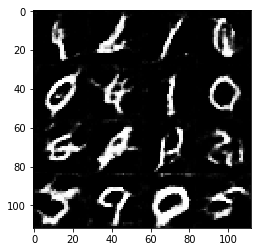

Epoch 2/2... Discriminator Loss: 1.3137... Generator Loss: 0.6549
Epoch 2/2... Discriminator Loss: 1.3808... Generator Loss: 0.6092
Epoch 2/2... Discriminator Loss: 1.2964... Generator Loss: 0.7573
Epoch 2/2... Discriminator Loss: 1.3915... Generator Loss: 0.5810
Epoch 2/2... Discriminator Loss: 1.4095... Generator Loss: 0.6184
Epoch 2/2... Discriminator Loss: 1.3446... Generator Loss: 0.9064
Epoch 2/2... Discriminator Loss: 1.3536... Generator Loss: 0.6570
Epoch 2/2... Discriminator Loss: 1.3434... Generator Loss: 0.6764
Epoch 2/2... Discriminator Loss: 1.3365... Generator Loss: 0.9811
Epoch 2/2... Discriminator Loss: 1.3094... Generator Loss: 0.9667


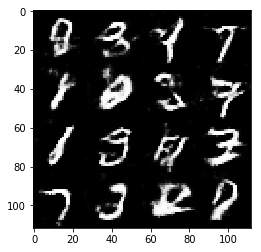

Epoch 2/2... Discriminator Loss: 1.3099... Generator Loss: 0.8974
Epoch 2/2... Discriminator Loss: 1.3667... Generator Loss: 0.7007
Epoch 2/2... Discriminator Loss: 1.3446... Generator Loss: 0.6744
Epoch 2/2... Discriminator Loss: 1.3331... Generator Loss: 0.8970
Epoch 2/2... Discriminator Loss: 1.2579... Generator Loss: 0.8950
Epoch 2/2... Discriminator Loss: 1.3614... Generator Loss: 0.7197
Epoch 2/2... Discriminator Loss: 1.3804... Generator Loss: 0.5809
Epoch 2/2... Discriminator Loss: 1.3034... Generator Loss: 0.7835
Epoch 2/2... Discriminator Loss: 1.3838... Generator Loss: 0.7080
Epoch 2/2... Discriminator Loss: 1.3593... Generator Loss: 0.6501


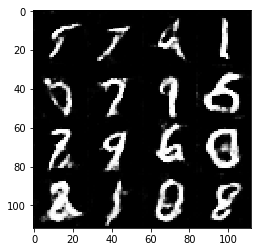

Epoch 2/2... Discriminator Loss: 1.3667... Generator Loss: 0.6415
Epoch 2/2... Discriminator Loss: 1.3428... Generator Loss: 0.6767
Epoch 2/2... Discriminator Loss: 1.3282... Generator Loss: 0.6552


In [ ]:
batch_size = 128
z_dim = 100
learning_rate = 0.003
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(202599, 28, 28, 3)
Epoch 1/1... Discriminator Loss: 2.3089... Generator Loss: 5.8556
Epoch 1/1... Discriminator Loss: 1.3353... Generator Loss: 2.4158
Epoch 1/1... Discriminator Loss: 5.3594... Generator Loss: 0.2165
Epoch 1/1... Discriminator Loss: 1.1069... Generator Loss: 0.9169
Epoch 1/1... Discriminator Loss: 1.5906... Generator Loss: 1.6357
Epoch 1/1... Discriminator Loss: 1.5320... Generator Loss: 3.3254
Epoch 1/1... Discriminator Loss: 0.8211... Generator Loss: 1.1674
Epoch 1/1... Discriminator Loss: 2.4408... Generator Loss: 2.8142
Epoch 1/1... Discriminator Loss: 3.3495... Generator Loss: 0.1675
Epoch 1/1... Discriminator Loss: 1.0849... Generator Loss: 1.1208


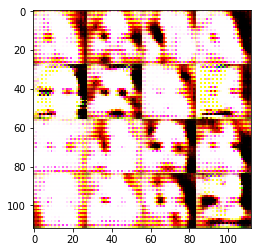

Epoch 1/1... Discriminator Loss: 2.1577... Generator Loss: 0.3636
Epoch 1/1... Discriminator Loss: 1.4766... Generator Loss: 0.8256
Epoch 1/1... Discriminator Loss: 1.6185... Generator Loss: 2.6972
Epoch 1/1... Discriminator Loss: 0.7157... Generator Loss: 1.3541
Epoch 1/1... Discriminator Loss: 1.4409... Generator Loss: 0.6292
Epoch 1/1... Discriminator Loss: 0.8437... Generator Loss: 1.8023
Epoch 1/1... Discriminator Loss: 0.5478... Generator Loss: 2.4499
Epoch 1/1... Discriminator Loss: 0.7569... Generator Loss: 1.4153
Epoch 1/1... Discriminator Loss: 1.6179... Generator Loss: 0.4207
Epoch 1/1... Discriminator Loss: 0.7942... Generator Loss: 1.5068


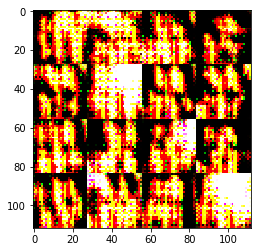

Epoch 1/1... Discriminator Loss: 0.4635... Generator Loss: 2.4334
Epoch 1/1... Discriminator Loss: 0.4208... Generator Loss: 3.0874
Epoch 1/1... Discriminator Loss: 0.9713... Generator Loss: 1.0117
Epoch 1/1... Discriminator Loss: 0.4668... Generator Loss: 2.3564
Epoch 1/1... Discriminator Loss: 0.4006... Generator Loss: 3.2798
Epoch 1/1... Discriminator Loss: 0.3917... Generator Loss: 3.5312
Epoch 1/1... Discriminator Loss: 1.2408... Generator Loss: 0.8469
Epoch 1/1... Discriminator Loss: 0.4143... Generator Loss: 2.9943
Epoch 1/1... Discriminator Loss: 0.3686... Generator Loss: 3.8567
Epoch 1/1... Discriminator Loss: 0.4262... Generator Loss: 3.7118


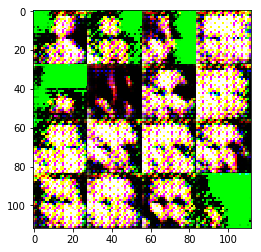

Epoch 1/1... Discriminator Loss: 0.3879... Generator Loss: 3.1084
Epoch 1/1... Discriminator Loss: 0.3533... Generator Loss: 4.7282
Epoch 1/1... Discriminator Loss: 0.3554... Generator Loss: 4.4938
Epoch 1/1... Discriminator Loss: 2.0232... Generator Loss: 0.2635
Epoch 1/1... Discriminator Loss: 0.7456... Generator Loss: 1.5140
Epoch 1/1... Discriminator Loss: 1.0395... Generator Loss: 1.2212
Epoch 1/1... Discriminator Loss: 1.1823... Generator Loss: 0.8617
Epoch 1/1... Discriminator Loss: 0.5369... Generator Loss: 1.9236
Epoch 1/1... Discriminator Loss: 0.7763... Generator Loss: 1.7687
Epoch 1/1... Discriminator Loss: 0.3969... Generator Loss: 4.5649


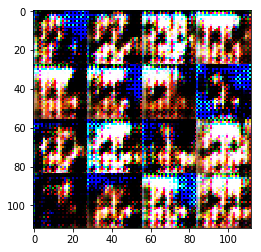

Epoch 1/1... Discriminator Loss: 0.4599... Generator Loss: 5.5032
Epoch 1/1... Discriminator Loss: 0.8071... Generator Loss: 1.1590
Epoch 1/1... Discriminator Loss: 0.4370... Generator Loss: 3.2455
Epoch 1/1... Discriminator Loss: 0.6515... Generator Loss: 1.5912
Epoch 1/1... Discriminator Loss: 1.4742... Generator Loss: 0.8399
Epoch 1/1... Discriminator Loss: 1.6015... Generator Loss: 0.6935
Epoch 1/1... Discriminator Loss: 1.4550... Generator Loss: 1.1281
Epoch 1/1... Discriminator Loss: 1.2643... Generator Loss: 1.3266
Epoch 1/1... Discriminator Loss: 1.3904... Generator Loss: 0.6591
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 1.0303


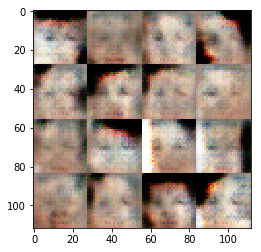

Epoch 1/1... Discriminator Loss: 1.6523... Generator Loss: 0.4198
Epoch 1/1... Discriminator Loss: 1.5030... Generator Loss: 0.7530
Epoch 1/1... Discriminator Loss: 1.4345... Generator Loss: 0.8386
Epoch 1/1... Discriminator Loss: 1.4321... Generator Loss: 0.6539
Epoch 1/1... Discriminator Loss: 1.2751... Generator Loss: 0.8405
Epoch 1/1... Discriminator Loss: 1.2440... Generator Loss: 0.8565
Epoch 1/1... Discriminator Loss: 1.2843... Generator Loss: 0.9327
Epoch 1/1... Discriminator Loss: 1.1954... Generator Loss: 0.9289
Epoch 1/1... Discriminator Loss: 1.5268... Generator Loss: 0.5169
Epoch 1/1... Discriminator Loss: 1.4529... Generator Loss: 0.6362


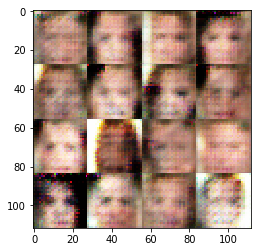

Epoch 1/1... Discriminator Loss: 1.1904... Generator Loss: 1.1422
Epoch 1/1... Discriminator Loss: 1.4557... Generator Loss: 0.8749
Epoch 1/1... Discriminator Loss: 1.2704... Generator Loss: 0.8497
Epoch 1/1... Discriminator Loss: 1.2685... Generator Loss: 0.7427
Epoch 1/1... Discriminator Loss: 1.1630... Generator Loss: 0.8229
Epoch 1/1... Discriminator Loss: 1.1488... Generator Loss: 0.9986
Epoch 1/1... Discriminator Loss: 1.2689... Generator Loss: 0.6043
Epoch 1/1... Discriminator Loss: 1.6561... Generator Loss: 0.4090
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.6155
Epoch 1/1... Discriminator Loss: 1.7580... Generator Loss: 0.6433


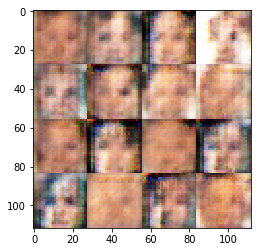

Epoch 1/1... Discriminator Loss: 1.6009... Generator Loss: 0.7030
Epoch 1/1... Discriminator Loss: 1.3790... Generator Loss: 0.7394
Epoch 1/1... Discriminator Loss: 1.3717... Generator Loss: 0.7356
Epoch 1/1... Discriminator Loss: 1.5367... Generator Loss: 1.3112
Epoch 1/1... Discriminator Loss: 1.3001... Generator Loss: 0.8831
Epoch 1/1... Discriminator Loss: 1.4266... Generator Loss: 0.8589
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.8104
Epoch 1/1... Discriminator Loss: 1.3227... Generator Loss: 0.7335
Epoch 1/1... Discriminator Loss: 1.2080... Generator Loss: 0.9752
Epoch 1/1... Discriminator Loss: 1.3148... Generator Loss: 0.7912


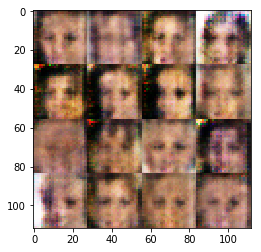

Epoch 1/1... Discriminator Loss: 1.3900... Generator Loss: 0.8033
Epoch 1/1... Discriminator Loss: 1.4409... Generator Loss: 0.5897
Epoch 1/1... Discriminator Loss: 1.2865... Generator Loss: 0.7933
Epoch 1/1... Discriminator Loss: 1.3343... Generator Loss: 0.7923
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.6831
Epoch 1/1... Discriminator Loss: 1.2753... Generator Loss: 0.7287
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.9664
Epoch 1/1... Discriminator Loss: 1.4383... Generator Loss: 0.7237
Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.8019
Epoch 1/1... Discriminator Loss: 1.3651... Generator Loss: 0.7551


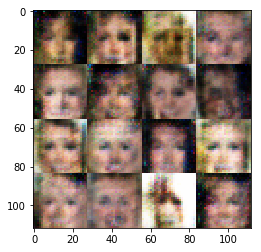

Epoch 1/1... Discriminator Loss: 1.4303... Generator Loss: 0.7331
Epoch 1/1... Discriminator Loss: 1.3484... Generator Loss: 0.7488
Epoch 1/1... Discriminator Loss: 1.3734... Generator Loss: 0.8178
Epoch 1/1... Discriminator Loss: 1.3245... Generator Loss: 0.7359
Epoch 1/1... Discriminator Loss: 1.3067... Generator Loss: 0.7468
Epoch 1/1... Discriminator Loss: 1.4843... Generator Loss: 0.8356
Epoch 1/1... Discriminator Loss: 1.4861... Generator Loss: 0.6491
Epoch 1/1... Discriminator Loss: 1.4415... Generator Loss: 0.8125
Epoch 1/1... Discriminator Loss: 1.5463... Generator Loss: 0.7617
Epoch 1/1... Discriminator Loss: 1.2947... Generator Loss: 0.8144


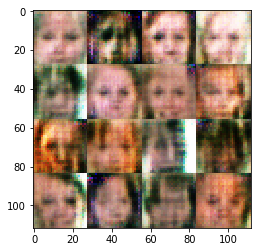

Epoch 1/1... Discriminator Loss: 1.3035... Generator Loss: 0.8570
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.6351
Epoch 1/1... Discriminator Loss: 1.4023... Generator Loss: 0.8111
Epoch 1/1... Discriminator Loss: 1.4125... Generator Loss: 0.6781
Epoch 1/1... Discriminator Loss: 1.4284... Generator Loss: 1.0567
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 0.8616
Epoch 1/1... Discriminator Loss: 1.3846... Generator Loss: 0.7050
Epoch 1/1... Discriminator Loss: 1.2693... Generator Loss: 0.8422
Epoch 1/1... Discriminator Loss: 1.4349... Generator Loss: 0.7672
Epoch 1/1... Discriminator Loss: 1.3552... Generator Loss: 0.8253


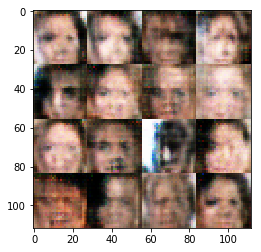

Epoch 1/1... Discriminator Loss: 1.3669... Generator Loss: 0.7798
Epoch 1/1... Discriminator Loss: 1.2928... Generator Loss: 0.8498
Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.9159
Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.7761
Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 0.7838
Epoch 1/1... Discriminator Loss: 1.3059... Generator Loss: 0.8481
Epoch 1/1... Discriminator Loss: 1.3666... Generator Loss: 0.6462
Epoch 1/1... Discriminator Loss: 1.4745... Generator Loss: 0.5963
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.7876


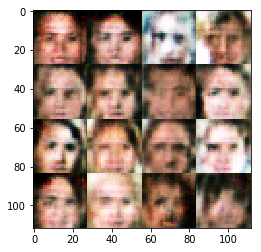

Epoch 1/1... Discriminator Loss: 1.4134... Generator Loss: 0.8001
Epoch 1/1... Discriminator Loss: 1.3239... Generator Loss: 0.8346
Epoch 1/1... Discriminator Loss: 1.3252... Generator Loss: 0.7931
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.8288
Epoch 1/1... Discriminator Loss: 1.4019... Generator Loss: 0.8889
Epoch 1/1... Discriminator Loss: 1.4768... Generator Loss: 0.6690
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.6863
Epoch 1/1... Discriminator Loss: 1.5113... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.4359... Generator Loss: 0.7514
Epoch 1/1... Discriminator Loss: 1.4184... Generator Loss: 0.9743


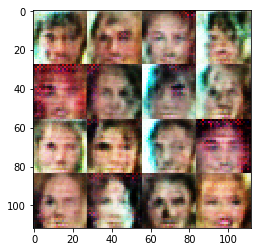

Epoch 1/1... Discriminator Loss: 1.3957... Generator Loss: 0.7309
Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 0.8539
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.7868
Epoch 1/1... Discriminator Loss: 1.3005... Generator Loss: 0.7470
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.9518
Epoch 1/1... Discriminator Loss: 1.3473... Generator Loss: 0.8076
Epoch 1/1... Discriminator Loss: 1.2991... Generator Loss: 0.8608
Epoch 1/1... Discriminator Loss: 1.3007... Generator Loss: 0.8923
Epoch 1/1... Discriminator Loss: 1.4092... Generator Loss: 0.6895
Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.8584


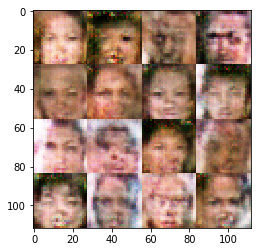

Epoch 1/1... Discriminator Loss: 1.4398... Generator Loss: 0.7548
Epoch 1/1... Discriminator Loss: 1.4334... Generator Loss: 0.7470
Epoch 1/1... Discriminator Loss: 1.3702... Generator Loss: 0.7714
Epoch 1/1... Discriminator Loss: 1.4062... Generator Loss: 0.6615
Epoch 1/1... Discriminator Loss: 1.3563... Generator Loss: 0.7130
Epoch 1/1... Discriminator Loss: 1.3496... Generator Loss: 0.8042
Epoch 1/1... Discriminator Loss: 1.3466... Generator Loss: 0.9221
Epoch 1/1... Discriminator Loss: 1.3202... Generator Loss: 0.9073
Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 0.7649
Epoch 1/1... Discriminator Loss: 1.3655... Generator Loss: 0.7478


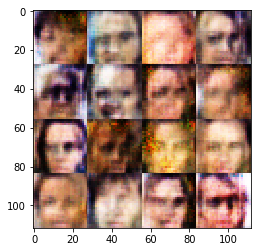

Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.7665
Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 0.7620
Epoch 1/1... Discriminator Loss: 1.3754... Generator Loss: 0.8364
Epoch 1/1... Discriminator Loss: 1.3735... Generator Loss: 0.7397
Epoch 1/1... Discriminator Loss: 1.3946... Generator Loss: 0.7737
Epoch 1/1... Discriminator Loss: 1.4455... Generator Loss: 0.7593
Epoch 1/1... Discriminator Loss: 1.3534... Generator Loss: 0.8462
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.8088
Epoch 1/1... Discriminator Loss: 1.3032... Generator Loss: 0.7433
Epoch 1/1... Discriminator Loss: 1.4125... Generator Loss: 0.5779


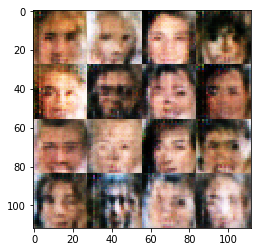

Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 0.7545
Epoch 1/1... Discriminator Loss: 1.3055... Generator Loss: 0.8264
Epoch 1/1... Discriminator Loss: 1.4044... Generator Loss: 0.7254
Epoch 1/1... Discriminator Loss: 1.3641... Generator Loss: 0.7078
Epoch 1/1... Discriminator Loss: 1.3866... Generator Loss: 0.9165
Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 0.8441
Epoch 1/1... Discriminator Loss: 1.3062... Generator Loss: 0.7563
Epoch 1/1... Discriminator Loss: 1.3368... Generator Loss: 0.7935
Epoch 1/1... Discriminator Loss: 1.3545... Generator Loss: 0.7676
Epoch 1/1... Discriminator Loss: 1.4232... Generator Loss: 0.7520


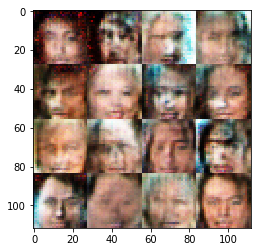

Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.8321
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.7403
Epoch 1/1... Discriminator Loss: 1.3099... Generator Loss: 0.9126
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.8502
Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 0.7480
Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.7316
Epoch 1/1... Discriminator Loss: 1.4213... Generator Loss: 0.7879
Epoch 1/1... Discriminator Loss: 1.4363... Generator Loss: 0.7475
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.7942
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.7969


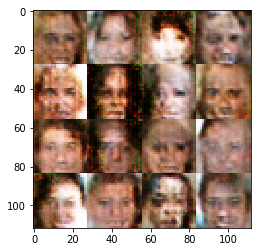

Epoch 1/1... Discriminator Loss: 1.3483... Generator Loss: 0.8178
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.7642
Epoch 1/1... Discriminator Loss: 1.4199... Generator Loss: 0.7922
Epoch 1/1... Discriminator Loss: 1.3617... Generator Loss: 0.7884
Epoch 1/1... Discriminator Loss: 1.3979... Generator Loss: 0.7557
Epoch 1/1... Discriminator Loss: 1.3608... Generator Loss: 0.8129
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.7890
Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.7470
Epoch 1/1... Discriminator Loss: 1.3497... Generator Loss: 0.7721
Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.7897


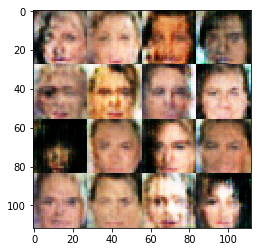

Epoch 1/1... Discriminator Loss: 1.4642... Generator Loss: 0.8160
Epoch 1/1... Discriminator Loss: 1.3842... Generator Loss: 0.7465
Epoch 1/1... Discriminator Loss: 1.3477... Generator Loss: 0.7443
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.7774
Epoch 1/1... Discriminator Loss: 1.3693... Generator Loss: 0.7600
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.7714
Epoch 1/1... Discriminator Loss: 1.3838... Generator Loss: 0.7700
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.7404
Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 0.8049
Epoch 1/1... Discriminator Loss: 1.3869... Generator Loss: 0.7845


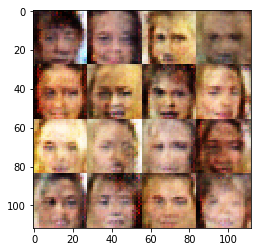

Epoch 1/1... Discriminator Loss: 1.3900... Generator Loss: 0.8110
Epoch 1/1... Discriminator Loss: 1.3228... Generator Loss: 0.8050
Epoch 1/1... Discriminator Loss: 1.3472... Generator Loss: 0.8293
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 0.7919
Epoch 1/1... Discriminator Loss: 1.3589... Generator Loss: 0.8312
Epoch 1/1... Discriminator Loss: 1.3680... Generator Loss: 0.8497
Epoch 1/1... Discriminator Loss: 1.3995... Generator Loss: 0.7242
Epoch 1/1... Discriminator Loss: 1.3687... Generator Loss: 0.7635
Epoch 1/1... Discriminator Loss: 1.3352... Generator Loss: 0.7916
Epoch 1/1... Discriminator Loss: 1.3930... Generator Loss: 0.7993


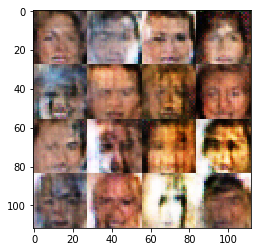

Epoch 1/1... Discriminator Loss: 1.3734... Generator Loss: 0.8011
Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 0.7522
Epoch 1/1... Discriminator Loss: 1.3472... Generator Loss: 0.8168
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 0.7789
Epoch 1/1... Discriminator Loss: 1.3843... Generator Loss: 0.8295
Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.7844
Epoch 1/1... Discriminator Loss: 1.3434... Generator Loss: 0.7414
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.7851
Epoch 1/1... Discriminator Loss: 1.3376... Generator Loss: 0.7935
Epoch 1/1... Discriminator Loss: 1.3560... Generator Loss: 0.8038


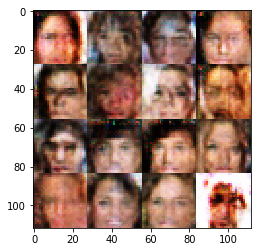

Epoch 1/1... Discriminator Loss: 1.4102... Generator Loss: 0.7997
Epoch 1/1... Discriminator Loss: 1.3847... Generator Loss: 0.7753
Epoch 1/1... Discriminator Loss: 1.3848... Generator Loss: 0.8169
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.7753
Epoch 1/1... Discriminator Loss: 1.3806... Generator Loss: 0.7867
Epoch 1/1... Discriminator Loss: 1.3470... Generator Loss: 0.7516
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.8339
Epoch 1/1... Discriminator Loss: 1.4007... Generator Loss: 0.8045
Epoch 1/1... Discriminator Loss: 1.3540... Generator Loss: 0.8282
Epoch 1/1... Discriminator Loss: 1.4003... Generator Loss: 0.7975


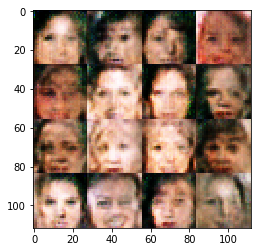

Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 0.8462
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 0.7992
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.8214
Epoch 1/1... Discriminator Loss: 1.3525... Generator Loss: 0.7638
Epoch 1/1... Discriminator Loss: 1.3846... Generator Loss: 0.7780
Epoch 1/1... Discriminator Loss: 1.4003... Generator Loss: 0.7611
Epoch 1/1... Discriminator Loss: 1.3833... Generator Loss: 0.8164
Epoch 1/1... Discriminator Loss: 1.3663... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 0.8444
Epoch 1/1... Discriminator Loss: 1.3042... Generator Loss: 0.7938


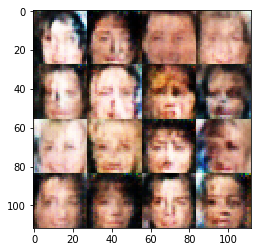

Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.7542
Epoch 1/1... Discriminator Loss: 1.3859... Generator Loss: 0.8266
Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.7774
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.7477
Epoch 1/1... Discriminator Loss: 1.3448... Generator Loss: 0.7803
Epoch 1/1... Discriminator Loss: 1.3370... Generator Loss: 0.7054
Epoch 1/1... Discriminator Loss: 1.3513... Generator Loss: 0.8394
Epoch 1/1... Discriminator Loss: 1.3366... Generator Loss: 0.8275
Epoch 1/1... Discriminator Loss: 1.3649... Generator Loss: 0.7937
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.8403


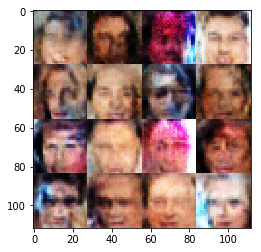

Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.7801
Epoch 1/1... Discriminator Loss: 1.3275... Generator Loss: 0.7876
Epoch 1/1... Discriminator Loss: 1.3117... Generator Loss: 0.8308
Epoch 1/1... Discriminator Loss: 1.4079... Generator Loss: 0.7572
Epoch 1/1... Discriminator Loss: 1.3983... Generator Loss: 0.7837
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.7470
Epoch 1/1... Discriminator Loss: 1.3963... Generator Loss: 0.7818
Epoch 1/1... Discriminator Loss: 1.3656... Generator Loss: 0.7337
Epoch 1/1... Discriminator Loss: 1.3763... Generator Loss: 0.7722
Epoch 1/1... Discriminator Loss: 1.3528... Generator Loss: 0.7930


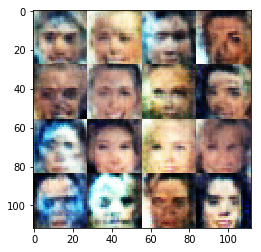

Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.8112
Epoch 1/1... Discriminator Loss: 1.3769... Generator Loss: 0.7885
Epoch 1/1... Discriminator Loss: 1.3501... Generator Loss: 0.7857
Epoch 1/1... Discriminator Loss: 1.3603... Generator Loss: 0.8110
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.8086
Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 0.8422
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.7877
Epoch 1/1... Discriminator Loss: 1.3641... Generator Loss: 0.7530
Epoch 1/1... Discriminator Loss: 1.3678... Generator Loss: 0.7835
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.8153


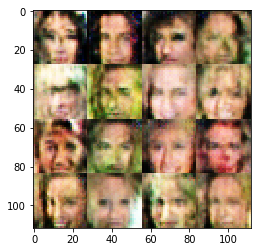

Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.7449
Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 0.7987
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.8230
Epoch 1/1... Discriminator Loss: 1.3589... Generator Loss: 0.8006
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.8296
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.8728
Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 0.7923
Epoch 1/1... Discriminator Loss: 1.3656... Generator Loss: 0.8089
Epoch 1/1... Discriminator Loss: 1.3615... Generator Loss: 0.8240
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.7723


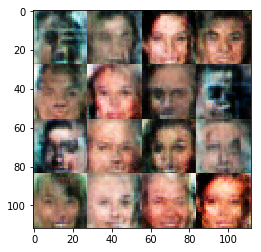

Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 0.8024
Epoch 1/1... Discriminator Loss: 1.3788... Generator Loss: 0.7933
Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 0.8373
Epoch 1/1... Discriminator Loss: 1.3585... Generator Loss: 0.7842
Epoch 1/1... Discriminator Loss: 1.3777... Generator Loss: 0.8010
Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.8233
Epoch 1/1... Discriminator Loss: 1.3605... Generator Loss: 0.8039
Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.8178
Epoch 1/1... Discriminator Loss: 1.3717... Generator Loss: 0.7894
Epoch 1/1... Discriminator Loss: 1.3726... Generator Loss: 0.8007


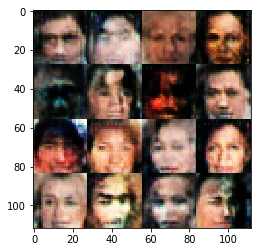

Epoch 1/1... Discriminator Loss: 1.3830... Generator Loss: 0.7267
Epoch 1/1... Discriminator Loss: 1.3622... Generator Loss: 0.8183
Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.7897
Epoch 1/1... Discriminator Loss: 1.3369... Generator Loss: 0.8413
Epoch 1/1... Discriminator Loss: 1.3726... Generator Loss: 0.7925
Epoch 1/1... Discriminator Loss: 1.3663... Generator Loss: 0.7753
Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.8066
Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.8108
Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.7725
Epoch 1/1... Discriminator Loss: 1.3638... Generator Loss: 0.7787


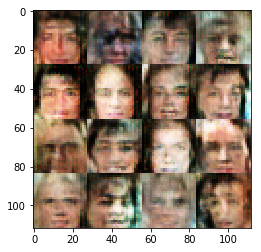

Epoch 1/1... Discriminator Loss: 1.3560... Generator Loss: 0.8251
Epoch 1/1... Discriminator Loss: 1.3796... Generator Loss: 0.8134
Epoch 1/1... Discriminator Loss: 1.3894... Generator Loss: 0.7526
Epoch 1/1... Discriminator Loss: 1.3608... Generator Loss: 0.8020
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.8277
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.7841
Epoch 1/1... Discriminator Loss: 1.3605... Generator Loss: 0.8160
Epoch 1/1... Discriminator Loss: 1.3599... Generator Loss: 0.8303
Epoch 1/1... Discriminator Loss: 1.3617... Generator Loss: 0.7474
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.7804


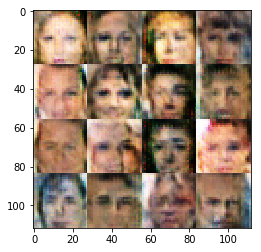

Epoch 1/1... Discriminator Loss: 1.3740... Generator Loss: 0.7776
Epoch 1/1... Discriminator Loss: 1.3952... Generator Loss: 0.7845
Epoch 1/1... Discriminator Loss: 1.3636... Generator Loss: 0.8362
Epoch 1/1... Discriminator Loss: 1.3883... Generator Loss: 0.8143
Epoch 1/1... Discriminator Loss: 1.3933... Generator Loss: 0.8238
Epoch 1/1... Discriminator Loss: 1.3543... Generator Loss: 0.7965
Epoch 1/1... Discriminator Loss: 1.3658... Generator Loss: 0.7950
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.8104
Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.8030
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.7773


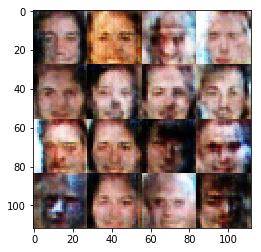

Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.8447
Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 0.7288
Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.8166
Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.3619... Generator Loss: 0.7780
Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 0.8006
Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.7575
Epoch 1/1... Discriminator Loss: 1.3817... Generator Loss: 0.8167
Epoch 1/1... Discriminator Loss: 1.4059... Generator Loss: 0.7834
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.8229


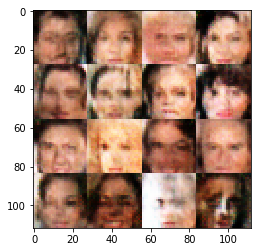

Epoch 1/1... Discriminator Loss: 1.3772... Generator Loss: 0.7827
Epoch 1/1... Discriminator Loss: 1.3675... Generator Loss: 0.7952
Epoch 1/1... Discriminator Loss: 1.3701... Generator Loss: 0.8163
Epoch 1/1... Discriminator Loss: 1.3516... Generator Loss: 0.7743
Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 0.7732
Epoch 1/1... Discriminator Loss: 1.3663... Generator Loss: 0.7998
Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 0.8210
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 0.7893
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 0.7667
Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 0.7964


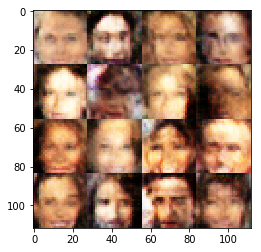

Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 0.8204
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 0.8145
Epoch 1/1... Discriminator Loss: 1.3784... Generator Loss: 0.8089
Epoch 1/1... Discriminator Loss: 1.3803... Generator Loss: 0.8150
Epoch 1/1... Discriminator Loss: 1.3955... Generator Loss: 0.7907
Epoch 1/1... Discriminator Loss: 1.3718... Generator Loss: 0.7983
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.7951
Epoch 1/1... Discriminator Loss: 1.3680... Generator Loss: 0.7919
Epoch 1/1... Discriminator Loss: 1.3479... Generator Loss: 0.8176
Epoch 1/1... Discriminator Loss: 1.3618... Generator Loss: 0.7956


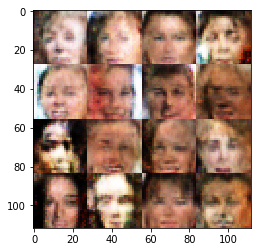

Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 0.8105
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.7832
Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.7904
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.7898
Epoch 1/1... Discriminator Loss: 1.3695... Generator Loss: 0.8190
Epoch 1/1... Discriminator Loss: 1.3693... Generator Loss: 0.8081
Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.7886
Epoch 1/1... Discriminator Loss: 1.3645... Generator Loss: 0.8293
Epoch 1/1... Discriminator Loss: 1.3886... Generator Loss: 0.8042
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.8020


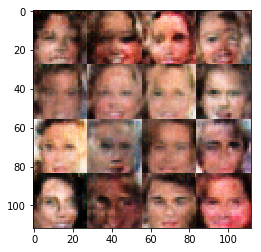

Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.8199
Epoch 1/1... Discriminator Loss: 1.3547... Generator Loss: 0.8251
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.8109
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.7980
Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 0.7728
Epoch 1/1... Discriminator Loss: 1.3639... Generator Loss: 0.7970
Epoch 1/1... Discriminator Loss: 1.3880... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 1.3614... Generator Loss: 0.8289
Epoch 1/1... Discriminator Loss: 1.3701... Generator Loss: 0.7805
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.7864


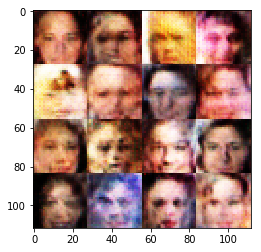

Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.7868
Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.7924
Epoch 1/1... Discriminator Loss: 1.3683... Generator Loss: 0.7977
Epoch 1/1... Discriminator Loss: 1.3575... Generator Loss: 0.8050
Epoch 1/1... Discriminator Loss: 1.3719... Generator Loss: 0.8183
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.8020
Epoch 1/1... Discriminator Loss: 1.3578... Generator Loss: 0.8205
Epoch 1/1... Discriminator Loss: 1.3729... Generator Loss: 0.8056
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.7899
Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.7737


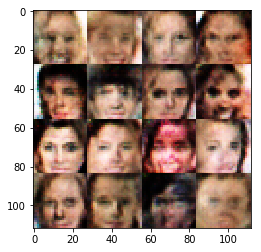

Epoch 1/1... Discriminator Loss: 1.3772... Generator Loss: 0.7289
Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 0.7528
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.8084
Epoch 1/1... Discriminator Loss: 1.3467... Generator Loss: 0.7852
Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.8427
Epoch 1/1... Discriminator Loss: 1.3673... Generator Loss: 0.8097
Epoch 1/1... Discriminator Loss: 1.3834... Generator Loss: 0.7982
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 0.8055
Epoch 1/1... Discriminator Loss: 1.3866... Generator Loss: 0.7964
Epoch 1/1... Discriminator Loss: 1.3718... Generator Loss: 0.7703


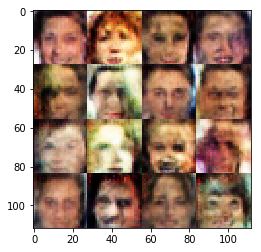

Epoch 1/1... Discriminator Loss: 1.3697... Generator Loss: 0.8055
Epoch 1/1... Discriminator Loss: 1.3523... Generator Loss: 0.7939
Epoch 1/1... Discriminator Loss: 1.3978... Generator Loss: 0.7927
Epoch 1/1... Discriminator Loss: 1.3541... Generator Loss: 0.8146
Epoch 1/1... Discriminator Loss: 1.3841... Generator Loss: 0.8241
Epoch 1/1... Discriminator Loss: 1.3638... Generator Loss: 0.7780
Epoch 1/1... Discriminator Loss: 1.3845... Generator Loss: 0.8073
Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 0.7917
Epoch 1/1... Discriminator Loss: 1.3662... Generator Loss: 0.7711
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.8149


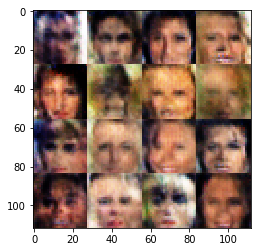

Epoch 1/1... Discriminator Loss: 1.3941... Generator Loss: 0.7749
Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.7999
Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 0.7794
Epoch 1/1... Discriminator Loss: 1.3837... Generator Loss: 0.7896
Epoch 1/1... Discriminator Loss: 1.3596... Generator Loss: 0.7932
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.7967
Epoch 1/1... Discriminator Loss: 1.3638... Generator Loss: 0.7728
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.8365
Epoch 1/1... Discriminator Loss: 1.3571... Generator Loss: 0.8178
Epoch 1/1... Discriminator Loss: 1.3552... Generator Loss: 0.8180


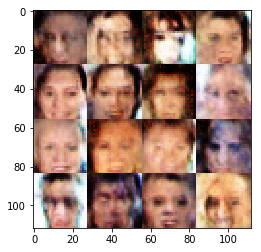

Epoch 1/1... Discriminator Loss: 1.3699... Generator Loss: 0.7878
Epoch 1/1... Discriminator Loss: 1.3845... Generator Loss: 0.8048
Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.7918
Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.7891
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.8034
Epoch 1/1... Discriminator Loss: 1.3702... Generator Loss: 0.8048
Epoch 1/1... Discriminator Loss: 1.3772... Generator Loss: 0.8245
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 0.7980
Epoch 1/1... Discriminator Loss: 1.3773... Generator Loss: 0.7960
Epoch 1/1... Discriminator Loss: 1.3726... Generator Loss: 0.8144


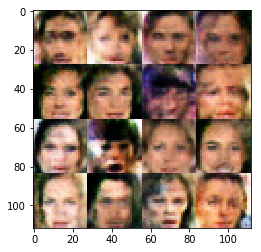

Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.8100
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.8019
Epoch 1/1... Discriminator Loss: 1.3930... Generator Loss: 0.7728
Epoch 1/1... Discriminator Loss: 1.3565... Generator Loss: 0.8243
Epoch 1/1... Discriminator Loss: 1.3858... Generator Loss: 0.8163
Epoch 1/1... Discriminator Loss: 1.3473... Generator Loss: 0.8169
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.7645
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.8012
Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.7855
Epoch 1/1... Discriminator Loss: 1.4022... Generator Loss: 0.7972


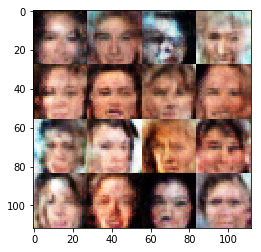

Epoch 1/1... Discriminator Loss: 1.3843... Generator Loss: 0.7967
Epoch 1/1... Discriminator Loss: 1.3842... Generator Loss: 0.7842
Epoch 1/1... Discriminator Loss: 1.3634... Generator Loss: 0.8336
Epoch 1/1... Discriminator Loss: 1.3972... Generator Loss: 0.8119
Epoch 1/1... Discriminator Loss: 1.3797... Generator Loss: 0.7771
Epoch 1/1... Discriminator Loss: 1.3803... Generator Loss: 0.8127
Epoch 1/1... Discriminator Loss: 1.3876... Generator Loss: 0.7804
Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.7927
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.8005
Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.8001


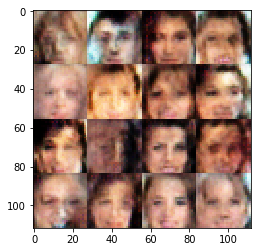

Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.7526
Epoch 1/1... Discriminator Loss: 1.3775... Generator Loss: 0.8237
Epoch 1/1... Discriminator Loss: 1.3717... Generator Loss: 0.8343
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 0.7655
Epoch 1/1... Discriminator Loss: 1.3818... Generator Loss: 0.7880
Epoch 1/1... Discriminator Loss: 1.3663... Generator Loss: 0.7836
Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 0.7981
Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.7864
Epoch 1/1... Discriminator Loss: 1.3751... Generator Loss: 0.8020
Epoch 1/1... Discriminator Loss: 1.3784... Generator Loss: 0.7914


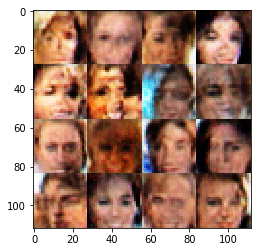

Epoch 1/1... Discriminator Loss: 1.3755... Generator Loss: 0.7836
Epoch 1/1... Discriminator Loss: 1.3651... Generator Loss: 0.8118
Epoch 1/1... Discriminator Loss: 1.3649... Generator Loss: 0.8080
Epoch 1/1... Discriminator Loss: 1.3787... Generator Loss: 0.7615
Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 0.7837
Epoch 1/1... Discriminator Loss: 1.3662... Generator Loss: 0.7822
Epoch 1/1... Discriminator Loss: 1.3866... Generator Loss: 0.8579
Epoch 1/1... Discriminator Loss: 1.3637... Generator Loss: 0.7989
Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.7619
Epoch 1/1... Discriminator Loss: 1.3641... Generator Loss: 0.8005


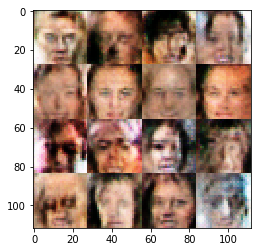

Epoch 1/1... Discriminator Loss: 1.4024... Generator Loss: 0.8464
Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 0.7692
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.7965
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.7373
Epoch 1/1... Discriminator Loss: 1.3619... Generator Loss: 0.8368
Epoch 1/1... Discriminator Loss: 1.3695... Generator Loss: 0.8149
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.7944
Epoch 1/1... Discriminator Loss: 1.3609... Generator Loss: 0.8063
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.8163
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.8193


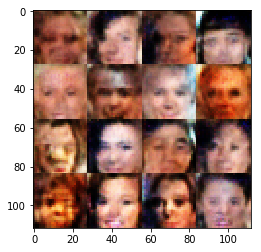

Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.7978
Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.8070
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.7742
Epoch 1/1... Discriminator Loss: 1.3578... Generator Loss: 0.7787
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.8260
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 1.3912... Generator Loss: 0.7821
Epoch 1/1... Discriminator Loss: 1.3653... Generator Loss: 0.7826
Epoch 1/1... Discriminator Loss: 1.3635... Generator Loss: 0.8009
Epoch 1/1... Discriminator Loss: 1.3599... Generator Loss: 0.7786


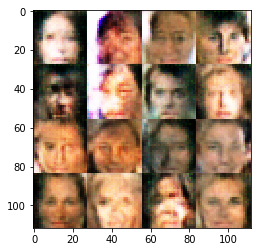

Epoch 1/1... Discriminator Loss: 1.3558... Generator Loss: 0.7872
Epoch 1/1... Discriminator Loss: 1.3868... Generator Loss: 0.7894
Epoch 1/1... Discriminator Loss: 1.3915... Generator Loss: 0.7977
Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.7780
Epoch 1/1... Discriminator Loss: 1.3753... Generator Loss: 0.8014
Epoch 1/1... Discriminator Loss: 1.3884... Generator Loss: 0.8002
Epoch 1/1... Discriminator Loss: 1.3871... Generator Loss: 0.7878
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.7894
Epoch 1/1... Discriminator Loss: 1.4022... Generator Loss: 0.7945
Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.7832


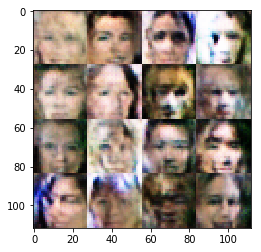

Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.7919
Epoch 1/1... Discriminator Loss: 1.3957... Generator Loss: 0.7999
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.7881
Epoch 1/1... Discriminator Loss: 1.3699... Generator Loss: 0.7913
Epoch 1/1... Discriminator Loss: 1.3694... Generator Loss: 0.8102
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.7938
Epoch 1/1... Discriminator Loss: 1.3754... Generator Loss: 0.8277
Epoch 1/1... Discriminator Loss: 1.3871... Generator Loss: 0.8108
Epoch 1/1... Discriminator Loss: 1.3726... Generator Loss: 0.7917
Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.8025


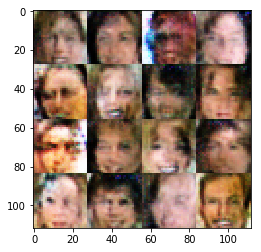

Epoch 1/1... Discriminator Loss: 1.3711... Generator Loss: 0.7939
Epoch 1/1... Discriminator Loss: 1.3767... Generator Loss: 0.7736
Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.7883
Epoch 1/1... Discriminator Loss: 1.3817... Generator Loss: 0.8117
Epoch 1/1... Discriminator Loss: 1.3665... Generator Loss: 0.7744
Epoch 1/1... Discriminator Loss: 1.3801... Generator Loss: 0.7999
Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.8266
Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.7787
Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.7943
Epoch 1/1... Discriminator Loss: 1.3699... Generator Loss: 0.7825


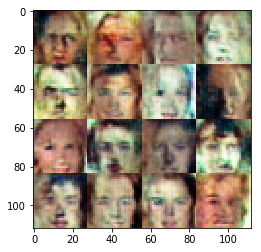

Epoch 1/1... Discriminator Loss: 1.3707... Generator Loss: 0.7897
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.8152
Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 0.8105
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.8109
Epoch 1/1... Discriminator Loss: 1.3701... Generator Loss: 0.8050
Epoch 1/1... Discriminator Loss: 1.3895... Generator Loss: 0.8149
Epoch 1/1... Discriminator Loss: 1.3803... Generator Loss: 0.8054
Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.7765
Epoch 1/1... Discriminator Loss: 1.3899... Generator Loss: 0.7606
Epoch 1/1... Discriminator Loss: 1.3775... Generator Loss: 0.8010


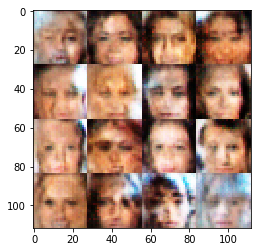

Epoch 1/1... Discriminator Loss: 1.3868... Generator Loss: 0.8001
Epoch 1/1... Discriminator Loss: 1.3761... Generator Loss: 0.7955
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.8075
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.8095
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 0.8119
Epoch 1/1... Discriminator Loss: 1.3690... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.3682... Generator Loss: 0.7980
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.7807
Epoch 1/1... Discriminator Loss: 1.3815... Generator Loss: 0.7903
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.7894


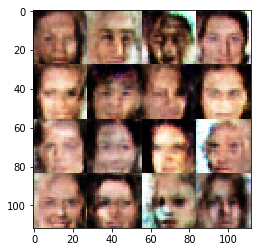

Epoch 1/1... Discriminator Loss: 1.3822... Generator Loss: 0.8209
Epoch 1/1... Discriminator Loss: 1.3861... Generator Loss: 0.7794
Epoch 1/1... Discriminator Loss: 1.3575... Generator Loss: 0.8104
Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 0.8069
Epoch 1/1... Discriminator Loss: 1.3927... Generator Loss: 0.7883
Epoch 1/1... Discriminator Loss: 1.3802... Generator Loss: 0.8211
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.7925
Epoch 1/1... Discriminator Loss: 1.3556... Generator Loss: 0.7995
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.7775
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.7984


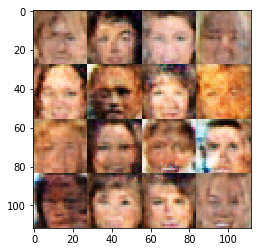

Epoch 1/1... Discriminator Loss: 1.3927... Generator Loss: 0.8039
Epoch 1/1... Discriminator Loss: 1.3628... Generator Loss: 0.7968
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.7942
Epoch 1/1... Discriminator Loss: 1.3694... Generator Loss: 0.8263
Epoch 1/1... Discriminator Loss: 1.3891... Generator Loss: 0.8046
Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 0.7970
Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.8037
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.8007
Epoch 1/1... Discriminator Loss: 1.3683... Generator Loss: 0.8031
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.8012


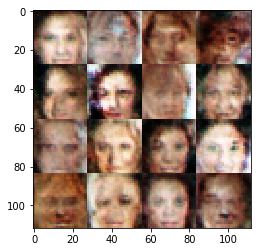

Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.7903
Epoch 1/1... Discriminator Loss: 1.3780... Generator Loss: 0.7825
Epoch 1/1... Discriminator Loss: 1.3688... Generator Loss: 0.7855
Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.8074
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.7775
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 0.8350
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.7803
Epoch 1/1... Discriminator Loss: 1.4012... Generator Loss: 0.7946
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.7843
Epoch 1/1... Discriminator Loss: 1.3749... Generator Loss: 0.8112


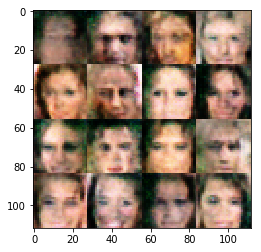

Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.7949
Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.8087
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.7677
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.7878
Epoch 1/1... Discriminator Loss: 1.3679... Generator Loss: 0.8218
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.8186
Epoch 1/1... Discriminator Loss: 1.4007... Generator Loss: 0.7901
Epoch 1/1... Discriminator Loss: 1.3690... Generator Loss: 0.7788


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.005
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.